In [1]:
#In this notebook I will access an external data source and work with its data
#Data from https://github.com/CSSEGISandData/COVID-19


In [2]:
#Pandas
#An open source data analysis and manipulation tool
#A python package that uses fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive.
import pandas as pd

#NumPy
#Provides tools for scientific and high performance computing, which are used in the pandas library.
#Array objects and functions usable on matrices facilitate much of the speed and convenience of the pandas library.
import numpy as np

#MathPlotLib
#Provides graphing functionality to create data visualizations in python.
#Allows for visualizations to be customized and scripted so that visualizations can be automated.
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Figure out yesterday's date, so that the data from the most recent date is used

import datetime

# Current date time in local system
today = datetime.date.today()
one_day = datetime.timedelta(days=1)
yesterday = today - one_day
print(yesterday)

#Reformat the date format and append .csv
data_date = yesterday.strftime('%m-%d-%Y')
daily_csv = data_date + '.csv'
daily_csv

#Before I can use this, I need to figure out how to automatically update the data each day

2020-03-29


'03-29-2020.csv'

In [4]:
#I installed git on my machine and then cloned the John Hopkins COVID dataset that Doug used in his COVID analysis
#git clone https://github.com/CSSEGISandData/COVID-19.git
#Then I figured out that I could access a datafile directly from git hub by going to the the raw tab on the dataset and getting the url
#I'm hoping this isn't rude to do

daily_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + daily_csv
print(daily_url)
df_daily = pd.read_csv(daily_url)
df_daily

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-29 23:08:25,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-29 23:08:25,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-29 23:08:25,37.767072,-75.632346,3,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-29 23:08:25,43.452658,-116.241552,92,1,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-29 23:08:25,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
5,21001.0,Adair,Kentucky,US,2020-03-29 23:08:25,37.104598,-85.281297,0,0,0,0,"Adair, Kentucky, US"
6,29001.0,Adair,Missouri,US,2020-03-29 23:08:25,40.190586,-92.600782,1,0,0,0,"Adair, Missouri, US"
7,40001.0,Adair,Oklahoma,US,2020-03-29 23:08:25,35.884942,-94.658593,4,0,0,0,"Adair, Oklahoma, US"
8,8001.0,Adams,Colorado,US,2020-03-29 23:08:25,39.874321,-104.336258,110,0,0,0,"Adams, Colorado, US"
9,16003.0,Adams,Idaho,US,2020-03-29 23:08:25,44.893336,-116.454525,0,0,0,0,"Adams, Idaho, US"


In [5]:
#Let's see what it tells us about our dataset
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 12 columns):
FIPS              3148 non-null float64
Admin2            3174 non-null object
Province_State    3261 non-null object
Country_Region    3434 non-null object
Last_Update       3434 non-null object
Lat               3434 non-null float64
Long_             3434 non-null float64
Confirmed         3434 non-null int64
Deaths            3434 non-null int64
Recovered         3434 non-null int64
Active            3434 non-null int64
Combined_Key      3434 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 322.0+ KB


In [6]:
df_daily.shape

(3434, 12)

In [7]:
df_daily.head()
#Hmm - several of the names flipped (ex "Latitude" to "Lat" and "Logitude" to "Long_") and some columns are new (ex. FIPS and Admin2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-29 23:08:25,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-29 23:08:25,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-29 23:08:25,37.767072,-75.632346,3,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-29 23:08:25,43.452658,-116.241552,92,1,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-29 23:08:25,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [8]:
#df_daily = df_daily.drop(columns=['Latitude','Longitude','Last Update'])
df_daily = df_daily.drop(columns=['Lat','Long_','Last_Update','FIPS', 'Admin2'])
df_daily.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Combined_Key
0,South Carolina,US,3,0,0,0,"Abbeville, South Carolina, US"
1,Louisiana,US,9,1,0,0,"Acadia, Louisiana, US"
2,Virginia,US,3,0,0,0,"Accomack, Virginia, US"
3,Idaho,US,92,1,0,0,"Ada, Idaho, US"
4,Iowa,US,1,0,0,0,"Adair, Iowa, US"


In [9]:
#Sum Confirmed, Deaths, and Recovered by Country/Region
Region = df_daily.groupby( ['Country_Region']).sum()
Region.head()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,120,4,2,114
Albania,212,10,33,169
Algeria,511,31,31,449
Andorra,334,6,1,327
Angola,7,2,0,5


In [10]:
Region.info()
#Note that doing the groupby changed the index, and now the bogus initial field/index is gone

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
Confirmed    177 non-null int64
Deaths       177 non-null int64
Recovered    177 non-null int64
Active       177 non-null int64
dtypes: int64(4)
memory usage: 6.9+ KB


In [11]:
#List the top 10 states based on confirmed cases
#Have to change this now that individual cities are listed
#US = df_daily[df_daily['Country_Region'] == 'US'].sort_values('Confirmed',ascending=False)

US = df_daily.groupby( ['Province_State','Country_Region']).sum()
US = US.reset_index()
US = US[US['Country_Region'] == 'US'].sort_values('Confirmed',ascending=False)

In [12]:
US.insert(0,'row_num',range(0,len(US)))
#US.set_index('row_num',inplace=True) - This would make row_num the index, which I don't need
US

,row_num,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
83,0,New York,US,59648,965,0,0
80,1,New Jersey,US,13386,161,0,0
14,2,California,US,5852,124,0,0
69,3,Michigan,US,5488,132,0,0
67,4,Massachusetts,US,4955,48,0,0
50,5,Illinois,US,4596,66,0,0
129,6,Washington,US,4465,198,0,0
26,7,Florida,US,4246,56,0,0
61,8,Louisiana,US,3540,151,0,0
96,9,Pennsylvania,US,3432,41,0,0


In [13]:
#tx_loc = US.loc[US['Province_State']=='Texas'].index[0]
tx_loc = int(US.loc[US['Province_State']=='Texas'].row_num)
tx_loc

10

In [14]:
#Just keep the rows from the top through Texas
if tx_loc < 10:
    US = US[:11]
elif tx_loc <= 20:
    US = US[:tx_loc+1]
else:
    US_comb = [US[:11],US[tx_loc:tx_loc+1]]
    US = pd.concat(US_comb)
US

,row_num,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
83,0,New York,US,59648,965,0,0
80,1,New Jersey,US,13386,161,0,0
14,2,California,US,5852,124,0,0
69,3,Michigan,US,5488,132,0,0
67,4,Massachusetts,US,4955,48,0,0
50,5,Illinois,US,4596,66,0,0
129,6,Washington,US,4465,198,0,0
26,7,Florida,US,4246,56,0,0
61,8,Louisiana,US,3540,151,0,0
96,9,Pennsylvania,US,3432,41,0,0


In [15]:
US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 83 to 120
Data columns (total 7 columns):
row_num           11 non-null int32
Province_State    11 non-null object
Country_Region    11 non-null object
Confirmed         11 non-null int64
Deaths            11 non-null int64
Recovered         11 non-null int64
Active            11 non-null int64
dtypes: int32(1), int64(4), object(2)
memory usage: 660.0+ bytes


In [16]:
#Don't really use this, but it is a good example of a filter
tx_filter = US['Province_State'] == 'Texas'
US[tx_filter]

,row_num,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
120,10,Texas,US,2792,37,0,0


In [17]:
#If I only want to print some of the columnns
US[['Province_State', 'Country_Region', 'Confirmed']]

,Province_State,Country_Region,Confirmed
83,New York,US,59648
80,New Jersey,US,13386
14,California,US,5852
69,Michigan,US,5488
67,Massachusetts,US,4955
50,Illinois,US,4596
129,Washington,US,4465
26,Florida,US,4246
61,Louisiana,US,3540
96,Pennsylvania,US,3432


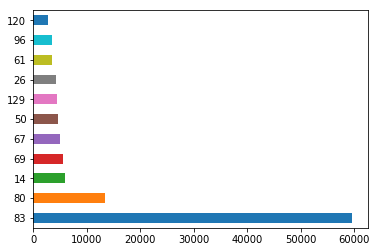

In [18]:
#Attempting to plot by US state based on confirmed cases
US['Confirmed'].plot.barh()
#Hmm can't figure out how to add y axis labels doing it this way
#Need to study this approach more

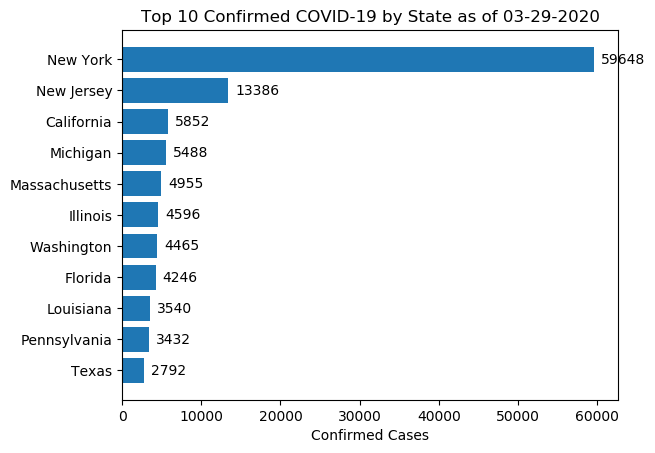

In [19]:
#Trying another way to plot the states with the top 10 confirmed case counts
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(US['Confirmed']))
ax.barh(y_pos, US['Confirmed'])
ax.set_yticks(y_pos)
ax.set_yticklabels(US['Province_State'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Confirmed Cases')
ax.set_title('Top 10 Confirmed COVID-19 by State as of ' + data_date)
for p in ax.patches :
    ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, -12), textcoords='offset points', horizontalalignment='left')
plt.show()

In [20]:
#Now I'm going to attempt to do a line graph with a trend line of US cases
df_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_ts.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [21]:
#Let's see what we've got
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 73 columns):
Province/State    79 non-null object
Country/Region    254 non-null object
Lat               254 non-null float64
Long              254 non-null float64
1/22/20           254 non-null int64
1/23/20           254 non-null int64
1/24/20           254 non-null int64
1/25/20           254 non-null int64
1/26/20           254 non-null int64
1/27/20           254 non-null int64
1/28/20           254 non-null int64
1/29/20           254 non-null int64
1/30/20           254 non-null int64
1/31/20           254 non-null int64
2/1/20            254 non-null int64
2/2/20            254 non-null int64
2/3/20            254 non-null int64
2/4/20            254 non-null int64
2/5/20            254 non-null int64
2/6/20            254 non-null int64
2/7/20            254 non-null int64
2/8/20            254 non-null int64
2/9/20            254 non-null int64
2/10/20           254 non-null int64
2/

In [22]:
US_ts = df_ts[df_ts['Country/Region'] == 'US']
US_ts = US_ts.drop(columns=['Lat','Long'])
US_ts

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
225,NaN,US,1,1,2,2,5,5,5,5,...,25489,33276,43847,53740,65778,83836,101657,121478,140886,161807


In [23]:
US_ts = US_ts.groupby( ['Country/Region']).sum().transpose()
US_ts.head(10)

Country/Region,US
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
1/27/20,5
1/28/20,5
1/29/20,5
1/30/20,5
1/31/20,7


In [24]:
US_ts = US_ts.reset_index()
US_ts.head(10)

Country/Region,index,US
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,5
5,1/27/20,5
6,1/28/20,5
7,1/29/20,5
8,1/30/20,5
9,1/31/20,7


In [25]:
US_ts.rename(columns={"index": "Date", "US": "ConfirmedCases"},inplace = True)
US_ts.index.names = ['US']
US_ts.head()

Country/Region,Date,ConfirmedCases
US,,
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,5


In [26]:
US_ts.info()
#Since Country/Region is an index instead of a data column, that appears to limit what I can do to it (for example, can't rename)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
Date              69 non-null object
ConfirmedCases    69 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [27]:
US_ts.index
#Looking at the index

RangeIndex(start=0, stop=69, step=1, name='US')

In [28]:
#Getting some stats on the data
US_ts.describe()

Country/Region,ConfirmedCases
count,69.000000
mean,13026.028986
std,33877.432704
min,1.000000
25%,11.000000
50%,51.000000
75%,2179.000000
max,161807.000000


In [29]:
#What day had the maximum confirmed cases?
#google pandas series operations for more
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
US_ts[US_ts.ConfirmedCases==US_ts.ConfirmedCases.max()]

Country/Region,Date,ConfirmedCases
US,,
68,3/30/20,161807


In [30]:
US_ts.columns

Index(['Date', 'ConfirmedCases'], dtype='object', name='Country/Region')

In [31]:
#US_ts.columns = ['Confirmed Cases']
US_ts.tail(10)

Country/Region,Date,ConfirmedCases
US,,
59,3/21/20,25489
60,3/22/20,33276
61,3/23/20,43847
62,3/24/20,53740
63,3/25/20,65778
64,3/26/20,83836
65,3/27/20,101657
66,3/28/20,121478
67,3/29/20,140886


In [32]:
#US_ts.plot(style='.-');
#confirmed[ countries ].tail(20).plot(figsize=(14,8))
#US_ts.tail(20).plot(figsize=(14,8), style='.-')

#I don't know why I can't get the dates labeled on the x axis

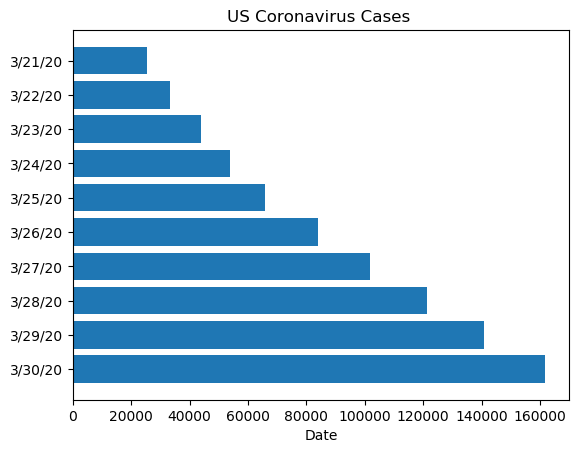

In [44]:
US_ts1=US_ts.tail(10)
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(US_ts1['ConfirmedCases']))
ax.barh(y_pos, US_ts1['ConfirmedCases'])
ax.set_yticks(y_pos)
ax.set_yticklabels(US_ts1['Date'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Date')
ax.set_title('US Coronavirus Cases ')
plt.show()

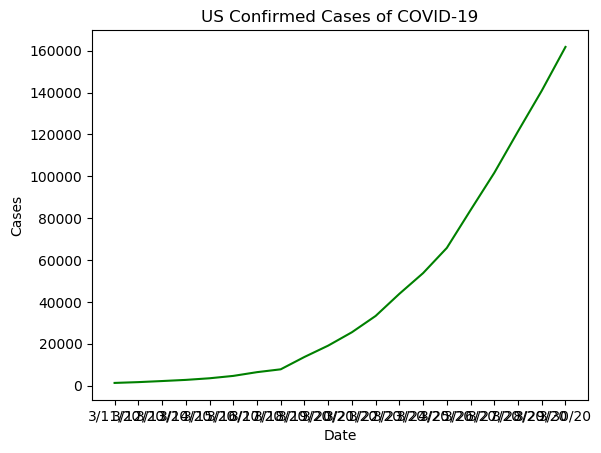

In [36]:
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('US Confirmed Cases of COVID-19')
plt.plot(US_ts1["Date"],US_ts1["ConfirmedCases"],color="green")

In [45]:
US_ts1.insert(2,'Delta',0)
US_ts1

Country/Region,Date,ConfirmedCases,Delta
US,,,
59,3/21/20,25489,0
60,3/22/20,33276,0
61,3/23/20,43847,0
62,3/24/20,53740,0
63,3/25/20,65778,0
64,3/26/20,83836,0
65,3/27/20,101657,0
66,3/28/20,121478,0
67,3/29/20,140886,0


In [50]:
len(US_ts1)

10

In [60]:
print(US_ts1[1:2])

Country/Region     Date  ConfirmedCases  Delta
US                                            
60              3/22/20           33276      0


In [67]:

for i in range(1,len(US_ts1)):
    diff = int(US_ts1.ConfirmedCases[i:i+1])-int(US_ts1.ConfirmedCases[i-1:i])
    US_ts1.Delta[i] = diff
    print(diff)
US_ts1

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\series.py:915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\Public\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


7787
10571
9893
12038
18058
17821
19821
19408
20921


Country/Region,Date,ConfirmedCases,Delta
US,,,
59,3/21/20,25489,0
60,3/22/20,33276,7787
61,3/23/20,43847,10571
62,3/24/20,53740,9893
63,3/25/20,65778,12038
64,3/26/20,83836,18058
65,3/27/20,101657,17821
66,3/28/20,121478,19821
67,3/29/20,140886,19408
